In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
ls

drive/  sample_data/


In [2]:
import matplotlib.pyplot as plt
# import numpy as np
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential

In [4]:
# Google Drive에 있는 훈련, 검증, 테스트 데이터셋의 경로를 지정합니다
train_dir = '/content/drive/MyDrive/dataset/train'
test_dir = '/content/drive/MyDrive/dataset/test'
validation_dir = '/content/drive/MyDrive/dataset/validation'

In [5]:
# 이미지를 0에서 1 사이의 값으로 정규화하는 함수를 정의합니다
def normalize_image(image, labels):
  image = tf.cast(image, tf.float32) / 255.0
  return image, labels

In [6]:
# 지정된 디렉토리에서 이미지 데이터셋을 로드하고, 이미지를 256x256 픽셀로 리사이즈하며, 라벨을 범주형 형식으로 지정합니다.

IMG_SIZE = (256, 256)

train_data = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                 label_mode = 'categorical',
                                                                 batch_size = 32,
                                                                 image_size= IMG_SIZE)

validation_data = tf.keras.preprocessing.image_dataset_from_directory(validation_dir,
                                                                 label_mode = 'categorical',
                                                                 batch_size = 32,
                                                                 image_size= IMG_SIZE)

test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                 label_mode = 'categorical',
                                                                 batch_size = 32,
                                                                 image_size= IMG_SIZE,
                                                                shuffle = False)

Found 6011 files belonging to 2 classes.
Found 2010 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


In [7]:
# 그런 다음 정의된 함수로 데이터를 정규화합니다

train_data = train_data.map(normalize_image)
validation_data = validation_data.map(normalize_image)
test_data = test_data.map(normalize_image)

In [8]:
# Keras Sequential API를 사용하여 CNN 모델을 정의합니다. 모델 아키텍처는 Convolution layer, Maxpooling layer, Batch Normalization, Dropout을 포함합니다. 마지막 레이어는 소프트맥스 활성화를 사용하여 다중 클래스 분류를 수행합니다
# Model은 이 데이터를 이용하여 먼저 분류를 해보신 분의 CNN 모델을 참고하였습니다. 이 사람은 512개의 filter로 한 것은 사용하지 않고 주석처리로 남겨놨는데, 아마도 학습 시간이 너무 오래걸려서가 아닐까 생각해봅니다..

model_CNN = Sequential([

    # Conv2D(filters = 512 , kernel_size=3, padding = 'valid', input_shape = (256, 256, 3), activation= 'relu'),
    # tf.keras.layers.MaxPooling2D(),
    # tf.keras.layers.BatchNormalization(),

    Conv2D(filters = 8, kernel_size = 5,input_shape = (256, 256, 3), activation= 'relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.BatchNormalization(),

    Conv2D(filters= 16, kernel_size=4, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),

    Conv2D(filters= 32, kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.BatchNormalization(),

    Conv2D(filters= 64, kernel_size=2, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.BatchNormalization(),

    Conv2D(filters= 128, kernel_size=1, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),

    Flatten(),
    tf.keras.layers.Dropout(0.3),
    Dense(units = 64, activation = 'softmax'),
    Dense(units = 20, activation = 'softmax'),
    Dense(units = 2, activation = 'softmax')
])

In [9]:
# Adam optimizer, Binary Cross entropy function, accuracy를 평가 지표로 사용하여 모델을 컴파일합니다

model_CNN.compile(optimizer = tf.keras.optimizers.Adam(),
                loss = 'BinaryCrossentropy',
                metrics=['accuracy'])

In [10]:
# train data를 사용하여 모델을 50번의 epochs 동안 train 시키고, validation data를 사용하여 검증합니다

hist = model_CNN.fit(train_data,
                    epochs = 50,
                    validation_data = validation_data,
                    validation_steps = int(0.5 * len(validation_data))
                    )

Epoch 1/50
188/188 [==============================] - 1760s 9s/step - loss: 0.6454 - accuracy: 0.7505 - val_loss: 0.6155 - val_accuracy: 0.7560
Epoch 2/50
188/188 [==============================] - 27s 139ms/step - loss: 0.5880 - accuracy: 0.7505 - val_loss: 0.5653 - val_accuracy: 0.7601
Epoch 3/50
188/188 [==============================] - 26s 135ms/step - loss: 0.5573 - accuracy: 0.7505 - val_loss: 0.5395 - val_accuracy: 0.7581
Epoch 4/50
188/188 [==============================] - 26s 136ms/step - loss: 0.5329 - accuracy: 0.7505 - val_loss: 0.5194 - val_accuracy: 0.7540
Epoch 5/50
188/188 [==============================] - 26s 136ms/step - loss: 0.5100 - accuracy: 0.7505 - val_loss: 0.5099 - val_accuracy: 0.7621
Epoch 6/50
188/188 [==============================] - 27s 137ms/step - loss: 0.4941 - accuracy: 0.7505 - val_loss: 0.5055 - val_accuracy: 0.7581
Epoch 7/50
188/188 [==============================] - 26s 133ms/step - loss: 0.4842 - accuracy: 0.7505 - val_loss: 0.4720 - val_acc

In [11]:
# 훈련된 모델을 test data로 평가하여 성능을 확인합니다

model_CNN.evaluate(test_data)

63/63 [==============================] - 514s 8s/step - loss: 0.4629 - accuracy: 0.8050


[0.462939977645874, 0.8050000071525574]

10000개의 data를 train : validation : test = 6 : 2 : 2의 비율로 나눠 CNN을 한 결과, 정확도는 약 80% 정도로 10000개의 DATA로만 해도 상당히 높은 정확도를 보이고 있습니다.

In [14]:
# F1 score로도 평가해보기 위해 f1 score 함수를 정의했습니다.

import tensorflow as tf
from tensorflow.keras import backend as K

def f1_score(y_true, y_pred):
    y_pred = K.round(y_pred)
    tp = K.sum(K.cast(y_true * y_pred, 'float'), axis=0)
    tn = K.sum(K.cast((1 - y_true) * (1 - y_pred), 'float'), axis=0)
    fp = K.sum(K.cast((1 - y_true) * y_pred, 'float'), axis=0)
    fn = K.sum(K.cast(y_true * (1 - y_pred), 'float'), axis=0)

    precision = tp / (tp + fp + K.epsilon())
    recall = tp / (tp + fn + K.epsilon())

    f1 = 2 * precision * recall / (precision + recall + K.epsilon())
    f1 = tf.where(tf.math.is_nan(f1), tf.zeros_like(f1), f1)
    return K.mean(f1)


In [15]:
# F1 score를 평가 지표로 추가했습니다

model_CNN.compile(optimizer = tf.keras.optimizers.Adam(),
                loss = 'BinaryCrossentropy',
                metrics=['accuracy', f1_score])

In [16]:
# 지표를 추가하였으니 다시 fitting을 합니다

hist = model_CNN.fit(train_data,
                    epochs = 50,
                    validation_data = validation_data,
                    validation_steps = int(0.5 * len(validation_data))
                    )

Epoch 1/50
188/188 [==============================] - 30s 128ms/step - loss: 0.2822 - accuracy: 0.8869 - f1_score: 0.8290 - val_loss: 0.4221 - val_accuracy: 0.8216 - val_f1_score: 0.6851
Epoch 2/50
188/188 [==============================] - 24s 123ms/step - loss: 0.2678 - accuracy: 0.8937 - f1_score: 0.8431 - val_loss: 0.3911 - val_accuracy: 0.8448 - val_f1_score: 0.7438
Epoch 3/50
188/188 [==============================] - 25s 127ms/step - loss: 0.2807 - accuracy: 0.8907 - f1_score: 0.8385 - val_loss: 0.4171 - val_accuracy: 0.8367 - val_f1_score: 0.7088
Epoch 4/50
188/188 [==============================] - 24s 125ms/step - loss: 0.2815 - accuracy: 0.8902 - f1_score: 0.8392 - val_loss: 0.3854 - val_accuracy: 0.8508 - val_f1_score: 0.7524
Epoch 5/50
188/188 [==============================] - 24s 123ms/step - loss: 0.2847 - accuracy: 0.8885 - f1_score: 0.8415 - val_loss: 0.4462 - val_accuracy: 0.8448 - val_f1_score: 0.7524
Epoch 6/50
188/188 [==============================] - 25s 131ms/s

In [17]:
# test data로 평가합니다. F1 score가 평가 지표로 추가된 것을 확인할 수 있습니다.
# 10000개의 데이터를 이용했을 때는 정확도에 비해 F1 score가 크지 않음을 알 수 있습니다. (약 0.45)

model_CNN.evaluate(test_data)

63/63 [==============================] - 7s 117ms/step - loss: 0.5206 - accuracy: 0.8140 - f1_score: 0.4500


[0.5206106305122375, 0.8140000104904175, 0.44999340176582336]

1/1 [==============================] - 0s 368ms/step


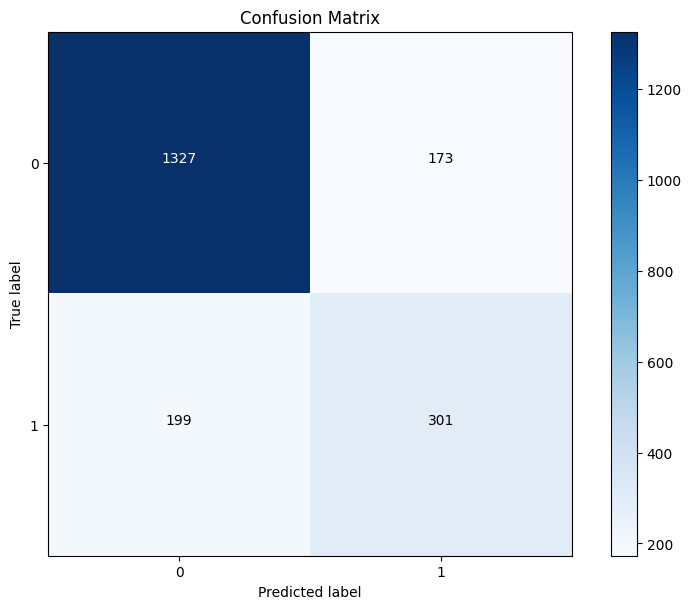

In [18]:
# F1 score가 정확도에 비해 낮은 이유를 분석하기 위해 confusion matrix를 그려봅니다.

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# 테스트 데이터셋에서 예측값과 실제 라벨을 가져옵니다.
y_pred = []
y_true = []
for images, labels in test_data:
    y_pred_batch = model_CNN.predict(images)
    y_pred.extend(np.argmax(y_pred_batch, axis=1))
    y_true.extend(np.argmax(labels, axis=1))

# 혼동 행렬 계산
conf_matrix = confusion_matrix(y_true, y_pred)

# 혼동 행렬 그리기
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

num_classes = len(conf_matrix)
tick_marks = np.arange(num_classes)
plt.xticks(tick_marks, range(num_classes))
plt.yticks(tick_marks, range(num_classes))

thresh = conf_matrix.max() / 2.
for i in range(num_classes):
    for j in range(num_classes):
        plt.text(j, i, format(conf_matrix[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if conf_matrix[i, j] > thresh else "black")

plt.tight_layout()
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()


그림을 그려보면 TP에 비해 FN이 TN, FP와 큰 차이가 나지 않아 F1 score가 작게 나옴을 알 수 있습니다.

이 현상이 나온 이유는, test data와 validation data, train data set이 모두 fake : real의 비율을 3:1로 맞춰서 넣었기 때문이라 생각합니다.

이러한 비율로 넣었던 이유는 저희가 원래 사용하고자 했던 데이터셋이 약 2:8의 비율로 fake 사진과 real 사진을 data set으로 사용했기 때문이었습니다.

하지만 이렇게 data set을 사용하게 되면 위의 confusion matrix처럼 FN의 값이 TN, FP와 큰 차이가 나지 않게 되어, 모델의 성능이 매우 뛰어난 것이 아닌 이상, 필수불가결적으로 F1 score가 낮아질 수 밖에 없겠다는 생각이 들었습니다.

기존에 저희가 사용하고자 했던 data set은 원래의 REAL 사진을 바탕으로 deepfake 기술을 사용하여 변형한 사진을 fake data로 사용하였습니다. 다양한 방법으로 fake 사진을 만들었기에, 하나의 real data가 여러 개의 fake data를 가지게 되었고, 이에 따라 어쩔 수 없이 fake data의 비중이 real data보다 클 수밖에 없었습니다.

하지만 제가 사용한 data는 fake data와 real data가 서로 독립적이기에 이러한 dataset이 있다면, fake data와 real data의 비중을 1:1에 가깝게 학습하고 평가하는 것이 F1 score 값을 높일 수 있는 방법이라고 생각합니다.

제가 생각한 개인적인 의견이니 틀릴 수 있습니다. 틀린 점이 있다면 알려주세요!